In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_rotation_angle(image):
    # Преобразование в градации серого и применение Canny edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Применение Hough Transform для нахождения линий
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

    # Вычисление углов каждой линии
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1) * 180. / np.pi
        angles.append(angle)

    # Вычисление среднего угла наклона
    median_angle = np.median(angles)
    return median_angle

In [2]:
#import PyPDF2
from pdf2image import convert_from_path

def process_image(file_path):
    # Определение формата файла
    if file_path.lower().endswith('.pdf'):
        # Обработка PDF
        images = convert_from_path(file_path, poppler_path=r"c:\poppler-23.11.0\Library\bin")
        image = cv2.cvtColor(np.array(images[2]), cv2.COLOR_RGB2BGR)  # обработка первой страницы
    else:
        # Обработка изображений в формате JPG
        image = cv2.imread(file_path)
   
   # Получение угла наклона
    angle = get_rotation_angle(image)

    # Поворот изображения
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # Вывод или сохранение результатов
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    plt.show()

    return rotated

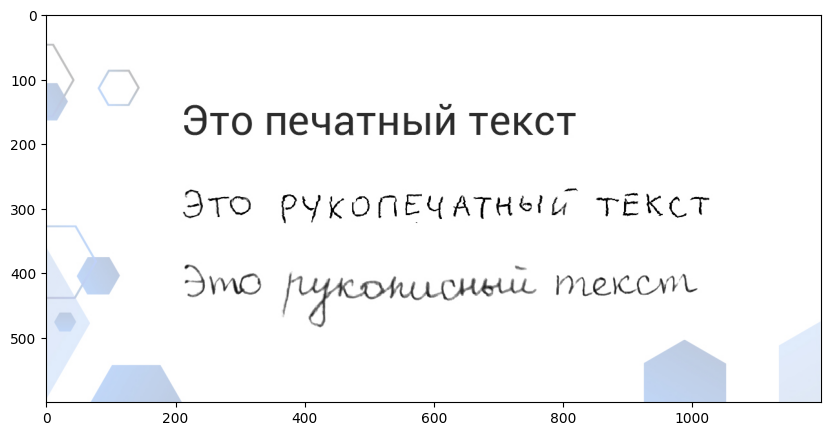

In [4]:
rotated = process_image('data/test_2.jpg')

In [5]:
#import easyocr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Создание объекта чтения EasyOCR
reader = easyocr.Reader(['ru'])  # Здесь можно указать нужный язык

# Использование EasyOCR для детектирования текста
result  = reader.readtext(rotated)

# Создание объекта figure и axes для отображения изображения
rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,12))
ax.imshow(rotated_rgb)

# Проход по каждой ограничивающей рамке и отрисовка ее на изображении
for (bbox, text, confidence) in result:
    # Получение координат рамки
    (x_min, y_min), (x_max, y_max) = bbox[0], bbox[2]
    width, height = x_max - x_min, y_max - y_min
    # Создание прямоугольника: (x, y) - начальная точка, width и height - размеры
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='g', facecolor='none')
    # Добавление прямоугольника на график
    ax.add_patch(rect)

# Отображение изображения с нарисованными bbox
plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


: 

In [5]:
import easyocr
import numpy as np
import pandas as pd
reader = easyocr.Reader(['ru']) 

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
rotated.shape

(2339, 1654, 3)

In [7]:
page_results = reader.detect(rotated)

In [10]:
import easyocr
import numpy as np
import pandas as pd

# Создание объекта для чтения с указанием языка
reader = easyocr.Reader(['ru'])  # Предполагаем, что текст на русском языке

# Список для хранения результатов
results = []

# Проход по всем изображениям и распознавание текста
for page_num, image in enumerate(rotated):
    # Преобразование изображения PIL в формат, подходящий для EasyOCR (numpy array)
    np_image = np.array(image)

    # Выполнение OCR
    page_results = reader.readtext(np_image)

    # Добавление результатов в список с указанием номера страницы
    for bbox, text, confidence in page_results:
        results.append({
            "page": page_num + 1,
            "text": text,
            "confidence": confidence,
            "bbox": bbox
        })

# Создание DataFrame из результатов
df = pd.DataFrame(results)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

KeyboardInterrupt: 

In [163]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det='TextSnake')
result = infer(rotated, return_vis=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


c:\ProgramData\anaconda3\envs\rost\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

c:\ProgramData\anaconda3\envs\rost\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


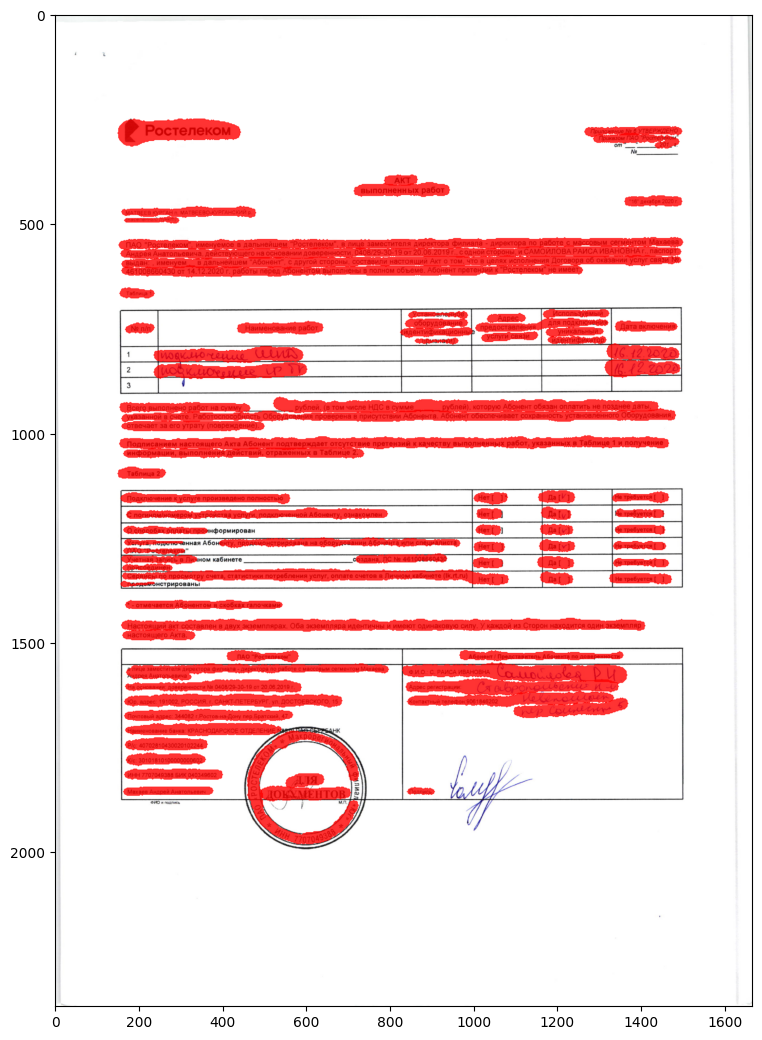

In [164]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

In [ ]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det='dbnetpp', det_weights = 'dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth')
result = infer(rotated, return_vis=True)

Loads checkpoint by local backend from path: dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth


c:\ProgramData\anaconda3\envs\rost\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

c:\ProgramData\anaconda3\envs\rost\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [202]:
import pandas as pd

# Ваши результаты от MMOCR
results = result['predictions'][0]

# Создаем списки для хранения данных
coordinates = []
scores = []

# Извлечение данных из результатов
for item in results['det_polygons']:
    coordinates.append(item)
for score in results['det_scores']:
    scores.append(score)

# Создание DataFrame
df = pd.DataFrame({
    'Coordinates': coordinates,
    'Score': scores
})
df

,Coordinates,Score
0,"[513.8342391304348, 1842.7839388145314, 511.57...",0.751778
1,"[857.8994565217391, 1845.0478011472273, 855.63...",0.636647
2,"[203.72282608695653, 1845.0478011472273, 201.4...",0.858165
3,"[581.741847826087, 1813.3537284894837, 579.478...",0.733858
4,"[187.87771739130434, 1802.0344168260037, 185.6...",0.865503
...,...,...
85,"[817.1548913043479, 384.8565965583174, 814.891...",0.769331
86,"[1460.0135869565217, 289.774378585086, 1457.75...",0.667971
87,"[1358.1521739130435, 285.24665391969404, 1355....",0.805636
88,"[1337.779891304348, 269.3996175908222, 1335.51...",0.836553


In [167]:
import cv2
import os
import shutil

# Путь к папке 'test'
output_folder = 'test'

# Проверка существования папки и ее удаление, если она существует
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)

# Создание новой папки 'test'
os.makedirs(output_folder)

# Итерация по DataFrame и сохранение обрезанных изображений
for index, row in df.iterrows():
    # Координаты уже в формате списка
    coordinates = row['Coordinates']

    # Вычисление координат для обрезки
    x_min, y_min = int(min(coordinates[0::2])), int(min(coordinates[1::2]))
    x_max, y_max = int(max(coordinates[0::2])), int(max(coordinates[1::2]))

    # Обрезка и сохранение изображения
    cropped_image = rotated[y_min:y_max, x_min:x_max]
    cv2.imwrite(os.path.join(output_folder, f'cropped_{index}.png'), cropped_image)


In [2]:
!python ocr_transformer/predict.py

transformer layers: 2
transformer heads: 4
hidden dim: 512
num classes: 92
backbone: conv(64)->conv(64)->conv(128)->conv(256)->conv(256)->conv(512)->conv(512)
dropout: 0.0
19,838,174 trainable parameters
loading weights from c:\Users\Vadim\projects\rostelekom_ocr\ocr_transformer_4h2l_simple_conv_64x256.pt
predictions are saved in c:\Users\Vadim\projects\rostelekom_ocrpredictions.tsv


In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def show_img_grid(images, labels, N):
    n = int(N**(0.5))
    k = 0
    f, axarr = plt.subplots(n,n,figsize=(10,10))
    for i in range(n):
        for j in range(n):
            axarr[i,j].set_title(labels[k])
            axarr[i,j].imshow(images[k])
            k += 1

df_rec = pd.read_csv("predictions.tsv", sep='\t', quoting=3)
df_rec

,filename,prediction
0,image_11.png,1821
1,image_12.png,11.13
2,image_16.png,19.04.2022
3,image_21.png,РУМВД России
4,image_22.png,по
5,image_24.png,Волгоградской обл
6,image_35.png,2.04.1987
7,image_36.png,Волгоград
8,image_42.png,Н.


In [3]:
import matplotlib.pyplot as plt
import math

def show_img_grid(images, labels, N):
    n = math.ceil(math.sqrt(N))  # Вычисляем размер сетки
    fig, axarr = plt.subplots(n, n)  # Создаем сетку подграфиков
    k = 0  # Индекс для перебора изображений и меток

    for i in range(n):
        for j in range(n):
            if k < N:  # Проверяем, не вышли ли мы за пределы списка изображений
                axarr[i, j].imshow(images[k])
                axarr[i, j].set_title(labels[k])
                axarr[i, j].axis('off')  # Скрываем оси
                k += 1
            else:
                axarr[i, j].axis('off')  # Скрываем пустые подграфики

    plt.tight_layout()
    plt.show()

In [4]:
from pathlib import Path
N = 4
images = []
labels = []
for i in range(N):
  idx = random.randint(0, len(df_rec))
  print(idx)
  image_path = Path('test') / df_rec.iloc[idx]['filename']
  predicted_label = df_rec.iloc[idx]['prediction']

  images.append(Image.open(image_path))
  labels.append(predicted_label)

show_img_grid(images, labels, N)

9


IndexError: single positional indexer is out-of-bounds

: 

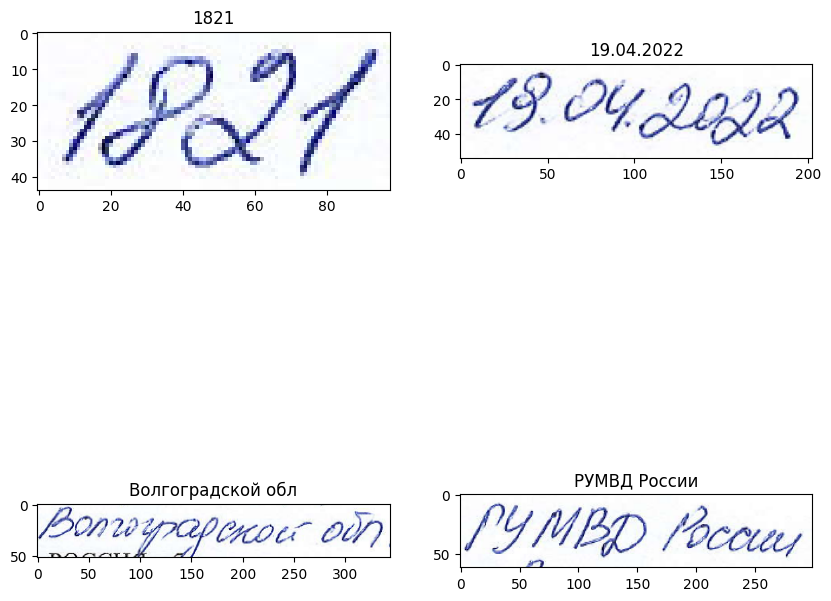

In [20]:
from pathlib import Path
from PIL import Image

# Заданные индексы
specific_indices = [0, 2, 5, 3]
images = []
labels = []

for idx in specific_indices:
    image_path = Path('test') / df_rec.iloc[idx]['filename']
    predicted_label = df_rec.iloc[idx]['prediction']

    images.append(Image.open(image_path))
    labels.append(predicted_label)

show_img_grid(images, labels, len(specific_indices))

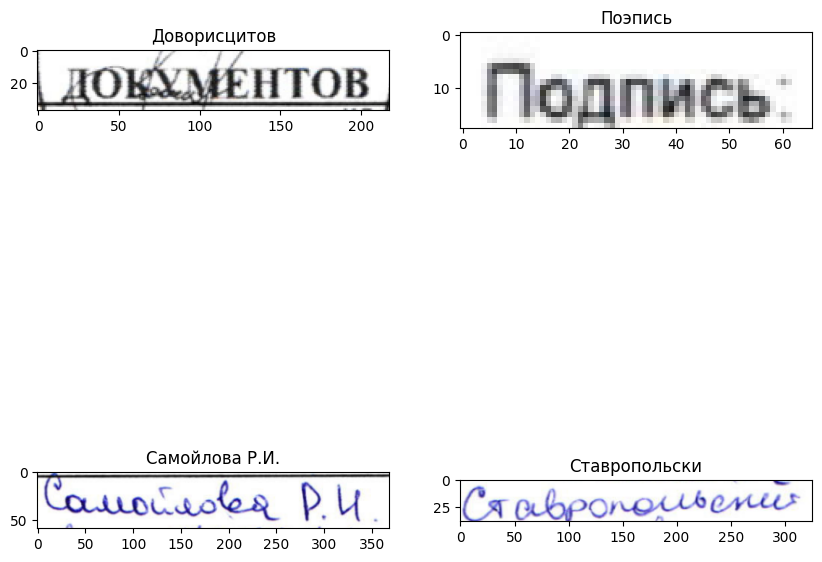

In [208]:
from pathlib import Path
from PIL import Image

# Заданные индексы
specific_indices = [0, 1, 90, 91]
images = []
labels = []

for idx in specific_indices:
    image_path = Path('test') / df_rec.iloc[idx]['filename']
    predicted_label = df_rec.iloc[idx]['prediction']

    images.append(Image.open(image_path))
    labels.append(predicted_label)

show_img_grid(images, labels, len(specific_indices))
